## Setup

### Imports

In [440]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
sns.set_theme(style='white', palette='Blues_r')

### Notebook settings

In [441]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_colwidth', None)

sns.set_theme(style='white', palette='Blues_r')

### Functions

In [442]:
# Functions 

#plot boxplot
def boxplot_(df, x, y, title, x_label, y_label, color='blue', target_var=False, hue=None, ticks=None, show_leg = False):
    if target_var == True:
        color = 'black'
    plt.subplots(figsize=(10,5))
    sns.boxplot(data=df, x=x, y=y, hue=hue, color=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(list(range(len(ticks))),ticks)
    plt.title(title)
    plt.legend().remove()
    plt.show()
    if show_leg == True:
        plt.legend(loc='best')

# plot scatterplot
def scatter_(df, x, y, title, x_label, y_label, color='blue', target_var=False, hue=None, show_leg = False):
    if target_var == True:
        color = 'black'
    plt.show()
    plt.subplots(figsize=(10,5))
    sns.scatterplot(data=df, x=x, y=y, hue=hue)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend().remove()
    if show_leg == True:
        plt.legend(loc='best')

# plot timeseries plot
def timeseries_plot(df, y, ylabel, color='blue', target_var=False, existing_ax=None):
    if target_var == True:
        color = 'black'
    if existing_ax == None:
        fig, ax = plt.subplots(figsize=(10,5))
    else:
        ax = existing_ax
    sns.lineplot(df, x=df.index, y=y, color=color, label=y.replace("_"," ").title())
    ax.set(title=f"{ylabel} over time", ylabel=ylabel, label=y, xlabel="Date")
    plt.legend(loc='best')

from statsmodels.tsa.stattools import adfuller

# function for adf test
def dickeyFullerTest(df):
    for column in df.columns:
        result = adfuller(df[column])
        # print(f"Column: {column}, ADF statistic: {result[0]}, p-value: {result[1]}")
        # for key, value in result[4].items():
        #     print(f"Critical value ({key}): {value}")
        if (result[1] < 0.05) &  (result[4]['1%'] > result[0]):
            print(f'{column} is stationary')
        else:
            print(f'{column} is not stationary')




from mpl_toolkits.axes_grid1 import host_subplot

# plot duel times series
def plot_dual_axis_timeseries(df, y1, y2, ylabel1, ylabel2, color1='blue', color2='black'):
    fig, axi = plt.subplots(figsize=(10,5))
    ax = host_subplot(111) # subplot(nrows, ncols, plot_number)
    ax0 = ax.twinx()
    ax1 = sns.lineplot(data=df, x=df.index, y=y1, ax=ax, color=color1, label=ylabel1, legend=False)
    ax2 = sns.lineplot(data=df, x=df.index, y=y2, ax=ax0, color=color2, label=ylabel2, legend=False)
    axi.set(xticks=[], yticks=[])
    ax1.set(ylabel=ylabel1, title=f"{ylabel1} and {ylabel2} over time")
    ax0.set(ylabel=ylabel2)
    ax.legend()
    ax.yaxis.get_label()
    ax.yaxis.get_label()


# annotate and vertical line
def annotate_and_line(x=None, y=None, color="red", linestyle="--", annotation=None, vertical_line=False, time_series=False, annot_x=None):    
    if time_series:
        x=pd.to_datetime(x)
        annot_x = pd.to_datetime(annot_x)
    if vertical_line:    
        plt.axvline(x, color=color, linestyle=linestyle)
    if annot_x:
        x = annot_x
    if annotation:
        plt.annotate(annotation, xy=(x, y), color=color)


# Corr bar plot
def corr_bar(df, title, y_label, group, var_comp):
    data = df.corr()[var_comp]
    plt.figure(figsize=(10,5))
    data[group].sort_values().plot(kind='bar', color='blue')
    plt.title(title)
    plt.ylabel(y_label)
    plt.show()


# Histogram and boxplot (and skew output) CLO
def den_hist_boxplot(data, features, bins, target_var=False, color='blue'):
    for col in features:
        if target_var == True:
            color = 'black'
        print(f'{col} skew: {round(data[col].skew(), 2)}')
        plt.figure(figsize = (15,5))
        plt.subplot(1, 2, 1)
        sns.histplot(data = data, features=data[col], bins=bins, stat='density', kde=True, color=color)
        plt.xticks(rotation=90)
        plt.ticklabel_format(style='plain')
        plt.title(f'Density Histogram of {col}')
        plt.subplot(1, 2, 2)
        sns.boxplot(data = data, x=data[col], color=color)
        plt.title(f'Boxplot of {col}')
        plt.xticks(rotation=90)


# Histogram JM
def histogram_plot(df, x, xlabel, bin_edges, stat='density', kde=True, color='blue', target_var=False, xrange=None, yrange=None):
    if target_var == True:
        color = 'black'
    fig, ax = plt.subplots(figsize = (10, 5))
    sns.histplot(data=df, x=x, stat=stat, kde=kde, bins=bin_edges, color=color),
    ax.set(title=f'{xlabel} Overall Distribution', xlabel=xlabel, xlim=xrange, ylim=yrange);

# Multiple annotation on a graph with arrow
def annotate_graph (text, xdate, y, xtext, ytext):
    plt.annotate(text, xy =((pd.to_datetime(xdate)), y), xytext =(pd.to_datetime(xtext), ytext),  
                arrowprops = dict(facecolor = 'blue', shrink = 0.05, headwidth = 7, headlength = 7),
                fontsize= 8)

# Correlation heatmap
def correlation_heat_map(df, title, method="pearson", vmin=-1, vmax=1):
    col_names = [col.replace("_", " ") for col in df.columns]
    ax = sns.heatmap(df.corr(method=method), annot=True, fmt=".2f", xticklabels=col_names, yticklabels=col_names, cmap="coolwarm", vmin=vmin, vmax=vmax)
    ax.set(title=title)

### Reading in data

In [443]:
df = pd.read_csv('../05.output/actual/actual.csv')
df['week'] = pd.to_datetime(df['week'])
df['week'].dtype
df.set_index('week', inplace=True)

## Univariate Analysis

In [444]:
# Creating % change columns that are calculated from the previous day's raw data.
df['breaches_delta_%_change'] = df['breaches_delta'] / df['breaches'].shift(1) 
df['new_demand_%_change'] = df['new_demand_delta'] / df['new_demand'].shift(1)
df['waiting_list_%_change'] = df['waiting_list_delta'] / df['waiting_list'].shift(1)
df.head(10)

,breaches,new_demand,waiting_list,breaches_delta,waiting_list_delta,new_demand_delta,scans_done,percent_breaches,capacity,breaches_delta_%_change,new_demand_%_change,waiting_list_%_change
week,,,,,,,,,,,,
2022-04-03,1257.3,1403.6,5802.5,16.5,108.9,0.0,1372.8,0.216682,1394,NaN,NaN,NaN
2022-04-10,1251.8,1416.8,5833.3,-5.5,30.8,13.2,1831.5,0.214596,1394,-0.004374,0.009404,0.005308
2022-04-17,1239.7,1117.6,5418.6,-12.1,-414.7,-299.2,1430.0,0.228786,1394,-0.009666,-0.211180,-0.071092
2022-04-24,1218.8,1028.5,5106.2,-20.9,-312.4,-89.1,1141.8,0.238690,1394,-0.016859,-0.079724,-0.057653
2022-05-01,1147.3,1173.7,4992.9,-71.5,-113.3,145.2,1295.8,0.229786,1394,-0.058664,0.141176,-0.022189
2022-05-08,1105.5,1076.9,4870.8,-41.8,-122.1,-96.8,987.8,0.226965,1394,-0.036433,-0.082474,-0.024455
2022-05-15,1058.2,1405.8,4959.9,-47.3,89.1,328.9,1620.3,0.213351,1394,-0.042786,0.305414,0.018293
2022-05-22,940.5,1344.2,4745.4,-117.7,-214.5,-61.6,1540.0,0.198192,1394,-0.111227,-0.043818,-0.043247
2022-05-29,805.2,1376.1,4549.6,-135.3,-195.8,31.9,1772.1,0.176983,1394,-0.143860,0.023732,-0.041261


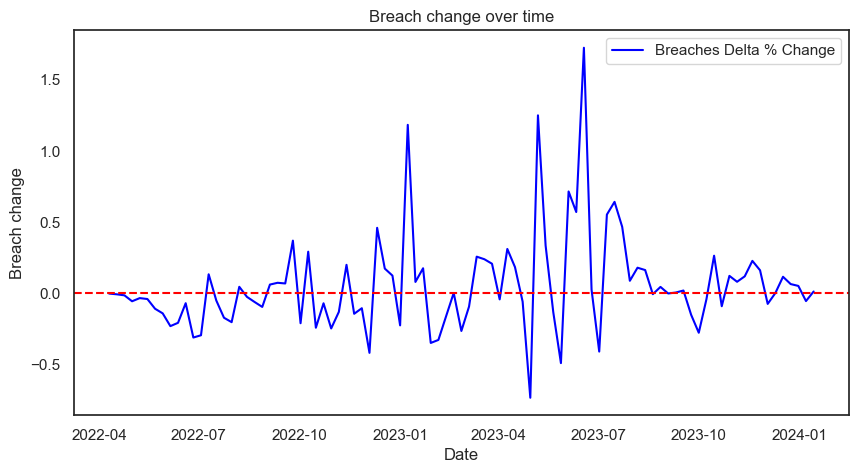

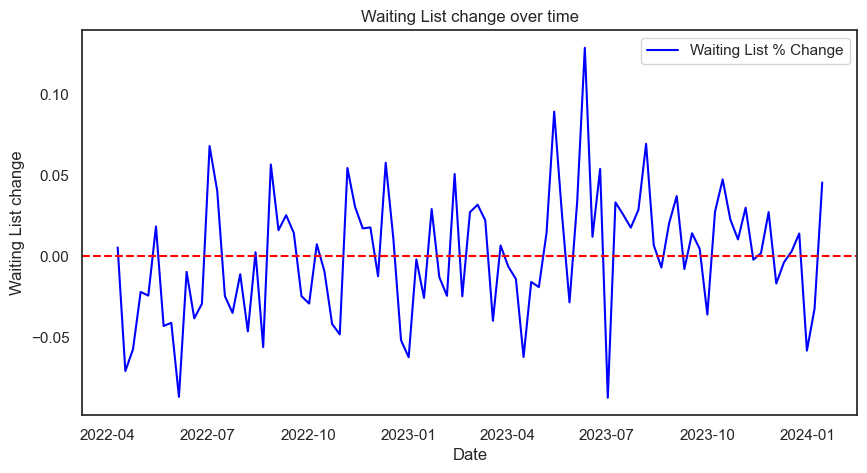

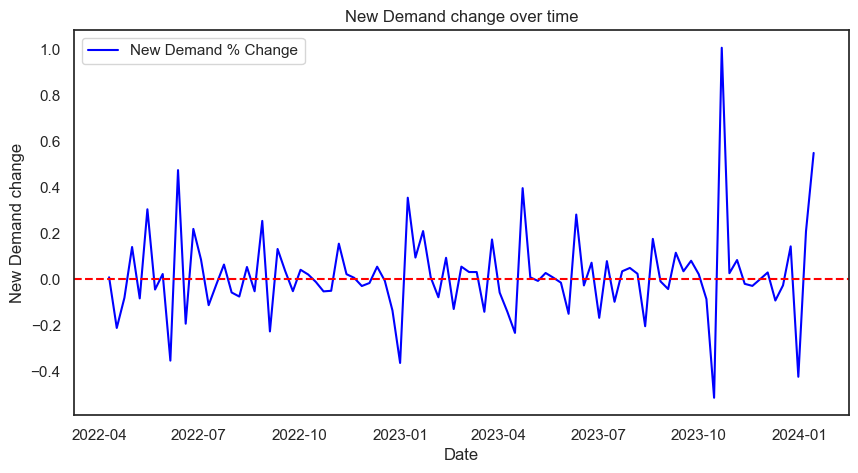

In [445]:
# Time series plots for the new % change columns.
timeseries_plot(df, 'breaches_delta_%_change', 'Breach change')
plt.axhline(0, color='red', linestyle='--')
timeseries_plot(df, 'waiting_list_%_change', 'Waiting List change')
plt.axhline(0, color='red', linestyle='--')
timeseries_plot(df, 'new_demand_%_change', 'New Demand change')
plt.axhline(0, color='red', linestyle='--')

Significant variation over time, some indication of seasonality. 

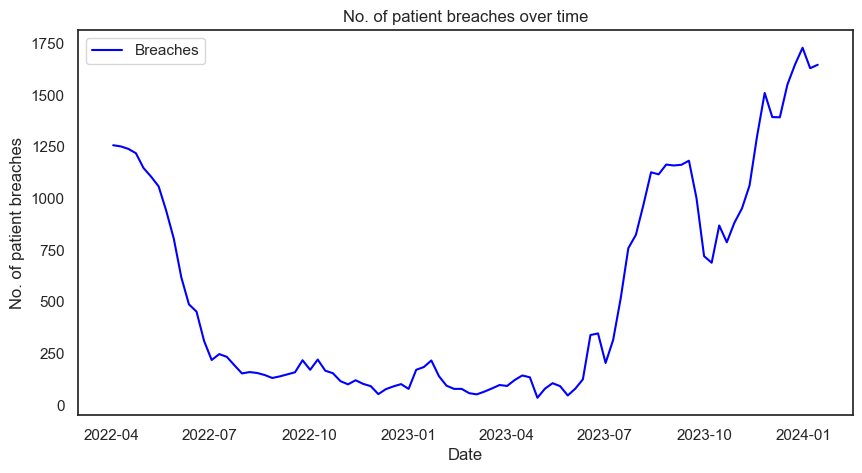

In [446]:
timeseries_plot(df, 'breaches', 'No. of patient breaches') # Plotting number of breaches over time.

The number of patient breaches has declined from roughly 1250 patients in April 22 to approx 150 patients in July 2022.

The trend has stayed fairly flat for a year until July 2023 where it started to show an upward trend until October 2023 where it peaked at roughly 1000 patients.

During October and november '23 it began a downward trend until mid november where it was about 800 patients.

Then in mid november it has shown an upward trend again peaking at 1600 patients in mid Jan '24

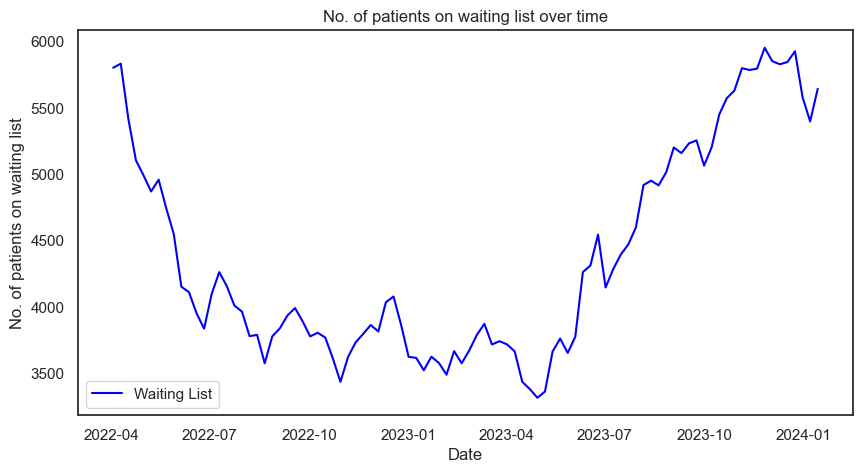

In [447]:
timeseries_plot(df, 'waiting_list', 'No. of patients on waiting list') # Plotting waiting list trends over time. 

The number of patients on the waiting list has declined from roughly 5750 patients in April 22 to approx 3750 patients in July 2022.

The trend has varied by about 500 patients for a year around 4000 patients until July 2023, where it started to show an upward trend until Jan '24 where it peaked at roughly 6000 patients.

Since then it has shown a downward trend by about 500 patients

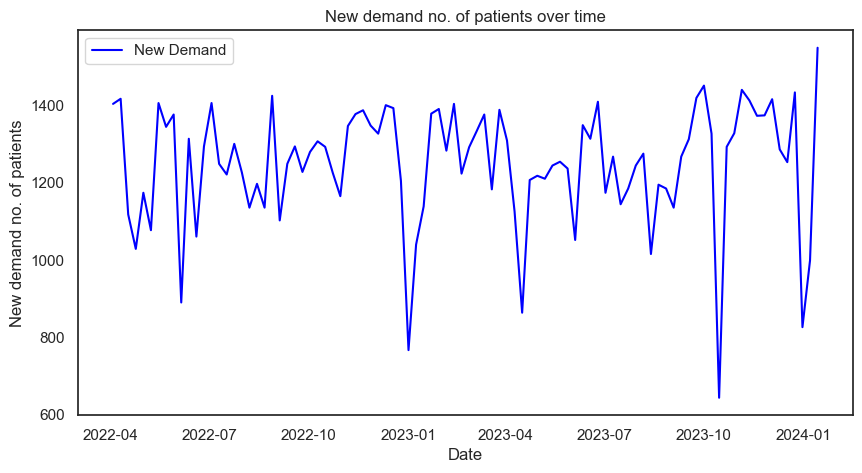

In [448]:
# plot time series plot of new demand variable
timeseries_plot(df, 'new_demand', 'New demand no. of patients')

New demand of patients has had a fairly constant mean of about 1150 patients with a fairly constant variation of about $\pm 250$ patients

New demand variable passed adf stationarity test - however need to ascertain whether this also looks for seasonality

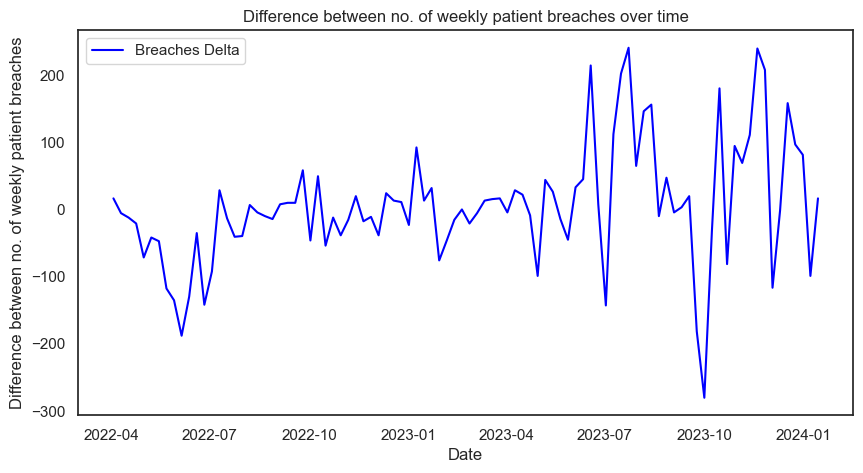

In [449]:
# plot breaches with 1st order diff
timeseries_plot(df, 'breaches_delta', 'Difference between no. of weekly patient breaches')

Here we have made the TS stationary by first order differencing --- adf test check stationarity, as does not look constant variance after July '23

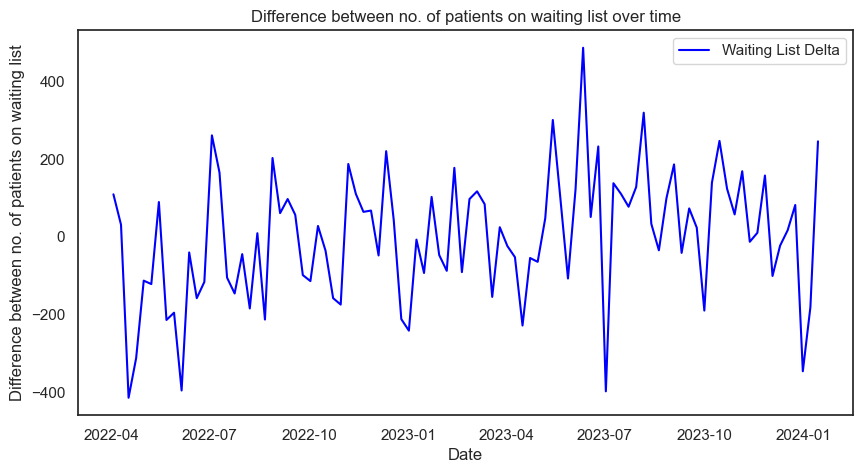

In [450]:
# plot waiting list by 1st order differencing
timeseries_plot(df, 'waiting_list_delta', 'Difference between no. of patients on waiting list')

Here we have made the TS stationary by first order differencing --- adf test confirm this?

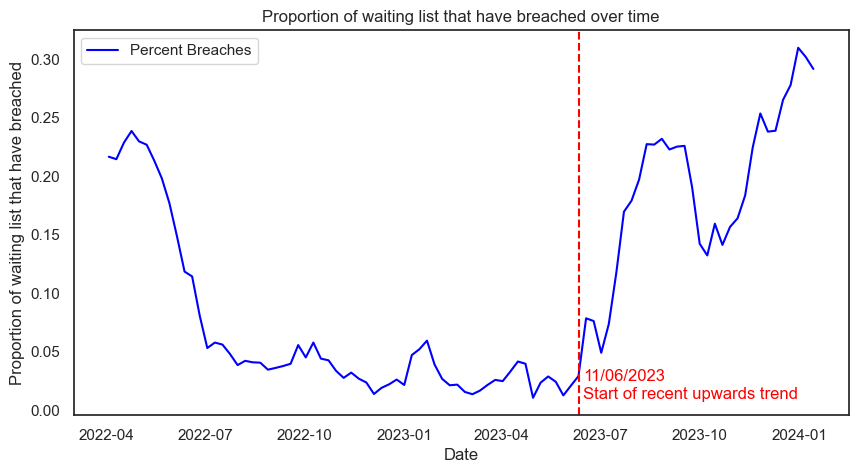

In [451]:
# Plot the percentage breaches over time so see how this has changed
timeseries_plot(df, 'percent_breaches', 'Proportion of waiting list that have breached')
annotate_and_line(
    x='2023-06-11', y=0.01, vertical_line=True, 
    time_series=True, annotation= '11/06/2023\nStart of recent upwards trend', 
    annot_x='2023-06-15'
    )

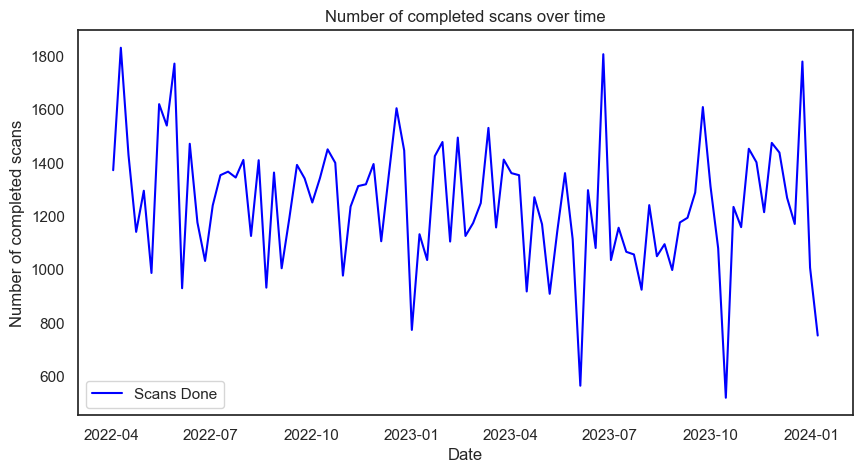

In [465]:
# Scans done over time
timeseries_plot(df.iloc[:-1], 'scans_done', 'Number of completed scans')

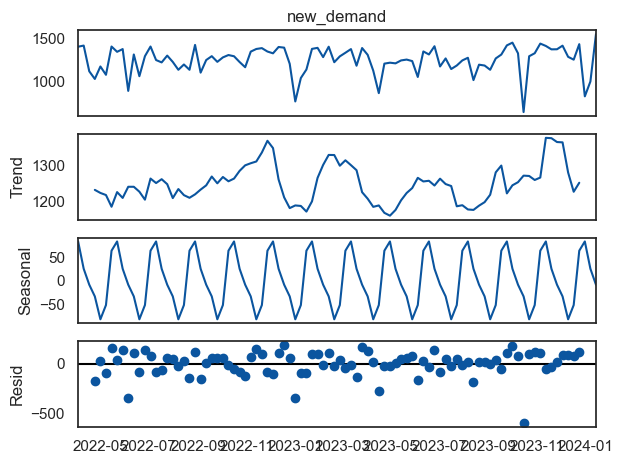

In [452]:
# get decomposition result of new demand variable
result = seasonal_decompose(df['new_demand'], model ='additive', period=7)

# plot all results of demand variable
result.plot();

In [453]:
result.seasonal

week
2022-04-03    82.847671
2022-04-10    25.503624
2022-04-17    -7.941614
2022-04-24   -32.539508
2022-05-01   -80.601047
                ...    
2023-12-17   -50.707640
2023-12-24    63.438514
2023-12-31    82.847671
2024-01-07    25.503624
2024-01-14    -7.941614
Name: seasonal, Length: 94, dtype: float64

## Bi-variate Analysis

### Insert subheading

### Hypothesis
H0: A percentage increase in new demand will not cause a percentage increase in breaches.

H0: Percentage increases in New Demand will not correlate with waiting lists.

In [454]:
# Checking skew for quick assessment of Pearson vs. Spearman, all appear skewed.
print(df['breaches_delta_%_change'].skew())
print(df['waiting_list_%_change'].skew())
print(df['new_demand_%_change'].skew())

2.0106610154290414
0.20355613892463234
1.3986016331516657


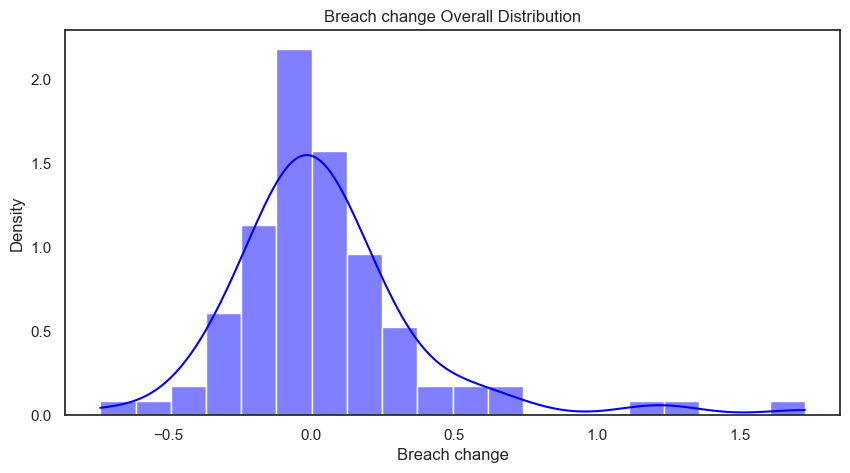

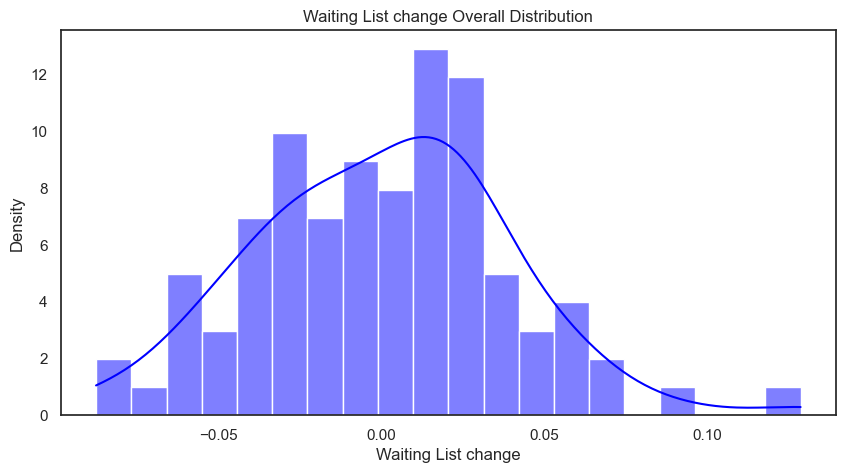

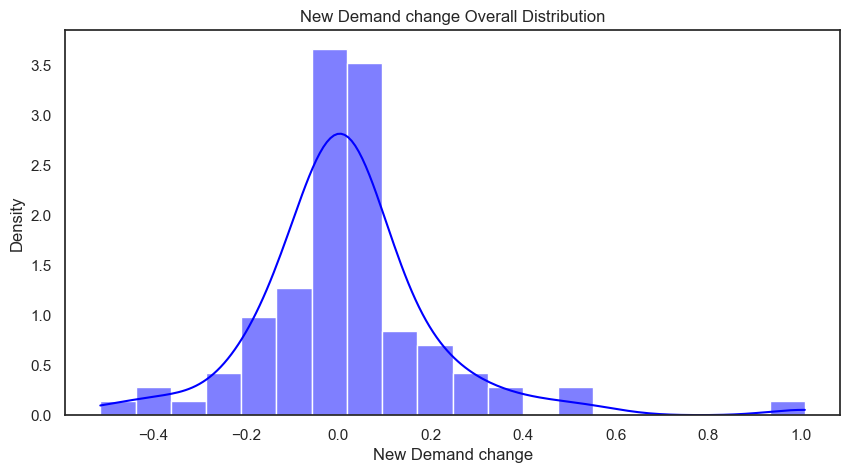

In [455]:
# Plotting histograms to confirm skew via visual inspection.
histogram_plot(df, 'breaches_delta_%_change', 'Breach change', 20)
histogram_plot(df, 'waiting_list_%_change', 'Waiting List change', 20)
histogram_plot(df, 'new_demand_%_change', 'New Demand change', 20)


Text(0.5, 1.0, 'Correlation Map of Variables')

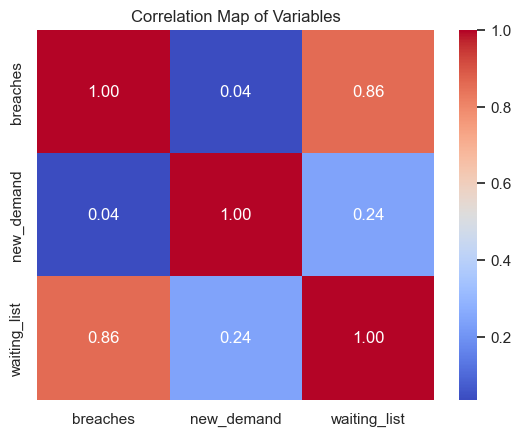

In [456]:
## Redoing correlation map with the raw data, not the percentage changes.
# Define correlation
df_corr = pd.concat([df['breaches'], df['new_demand'], df['waiting_list']], axis=1)

# Calculate Spearman correlation due to non-normal distribution.
corr_matrix = df_corr.corr(method='spearman')

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Map of Variables')

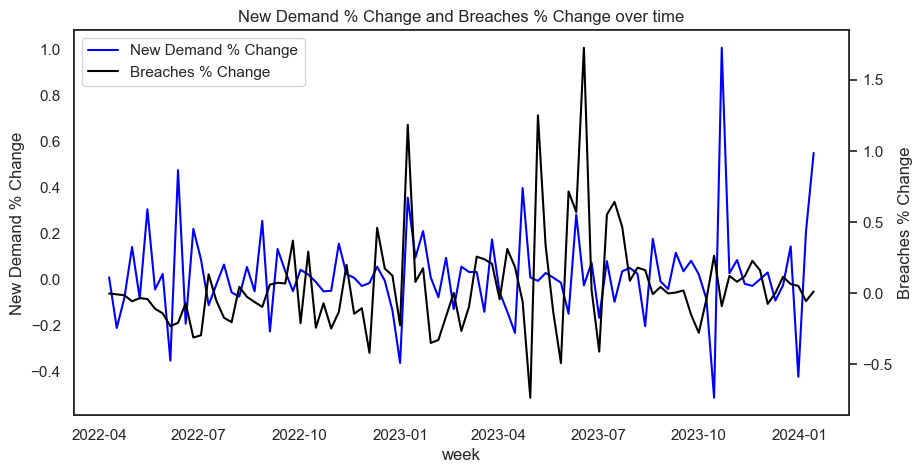

In [457]:
plot_dual_axis_timeseries(df, y1='new_demand_%_change', y2='breaches_delta_%_change', ylabel1='New Demand % Change', ylabel2='Breaches % Change')

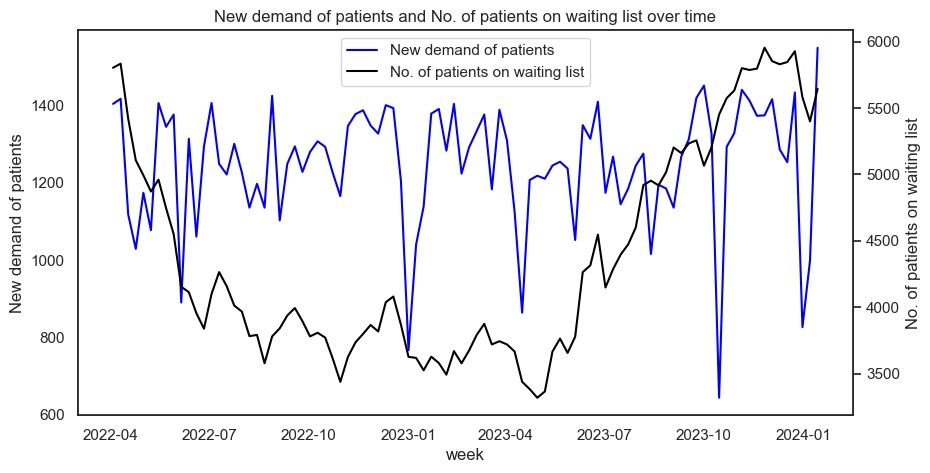

In [458]:
# plot TS of new damand and witing list
plot_dual_axis_timeseries(df, 'new_demand', 'waiting_list', 'New demand of patients', 'No. of patients on waiting list', color1='blue', color2='black')

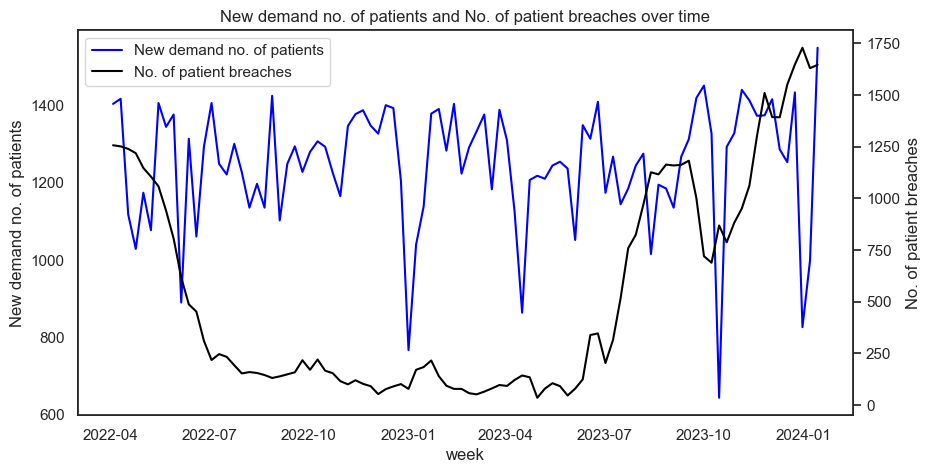

In [459]:
# plot TS of new demand and breaches
plot_dual_axis_timeseries(df, 'new_demand', 'breaches', 'New demand no. of patients', 'No. of patient breaches', color1='blue', color2='black')

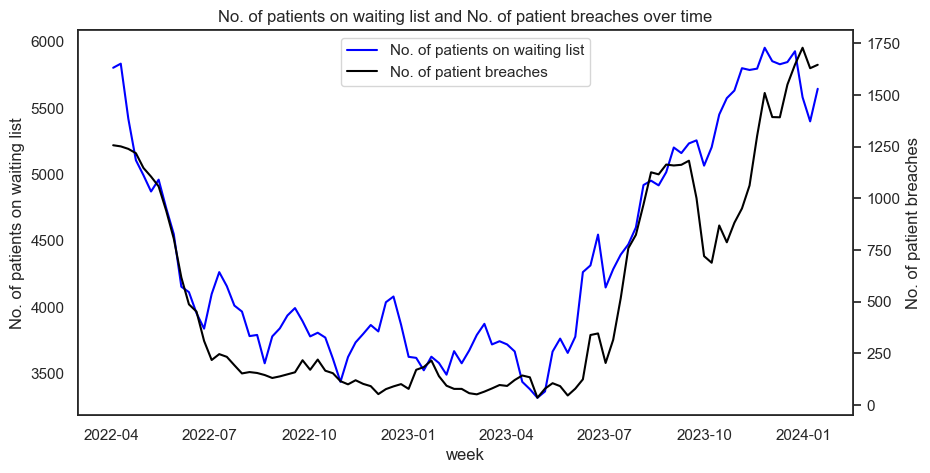

In [460]:
# plt TS of waiting list and breaches
plot_dual_axis_timeseries(df, 'waiting_list', 'breaches', 'No. of patients on waiting list', 'No. of patient breaches', color1='blue', color2='black')

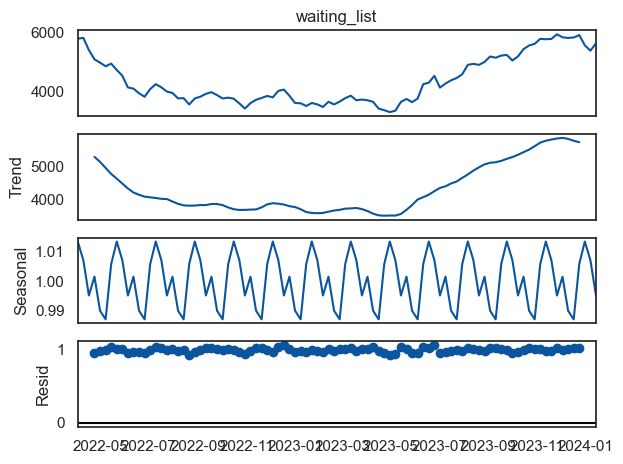

In [461]:
from statsmodels.tsa.seasonal import seasonal_decompose

# get decomposition result
result = seasonal_decompose(df['waiting_list'], model ='multiplicative', period=7)

# plot all results 
result.plot();

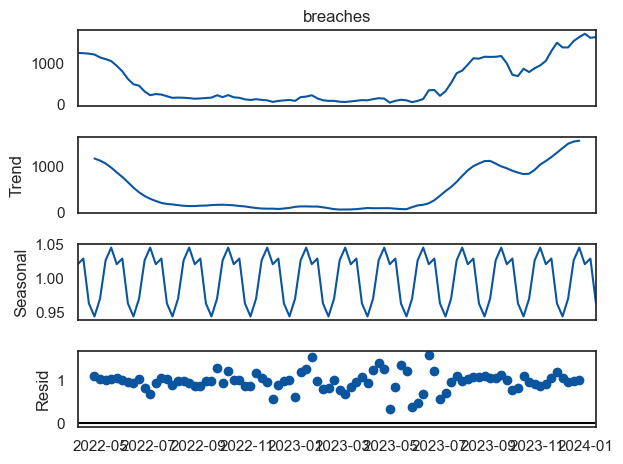

In [462]:
from statsmodels.tsa.seasonal import seasonal_decompose

# get decomposition result
result = seasonal_decompose(df['breaches'], model ='multiplicative', period=7)

# plot all results 
result.plot();

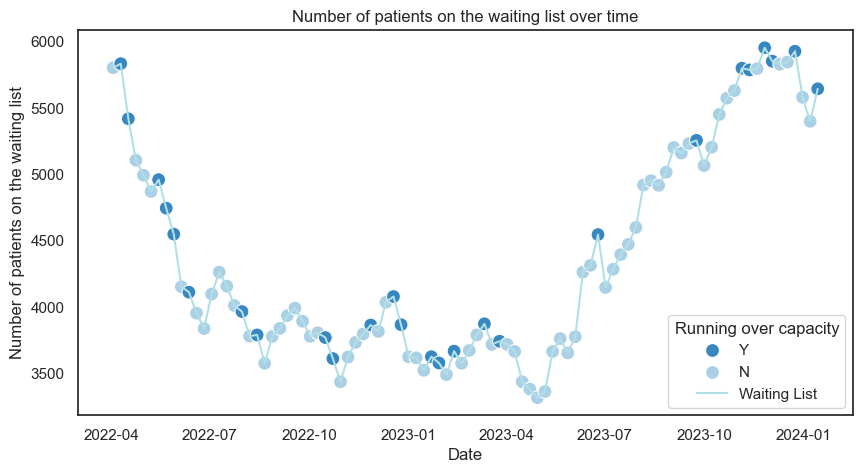

In [463]:
# Create a column showing percentage of capacity being used
df['percentage_of_capacity_used'] = df['scans_done'] / df['capacity']
# Create a column to show whether the CT scans are runnning over capacity
df['running_over_capacity'] = df['percentage_of_capacity_used'].apply(lambda x: 'Y' if x>1 else 'N')
# Plot the wating list
timeseries_plot(df, 'waiting_list', 'Number of patients on the waiting list', color='powderblue')
plt.legend()
# Plot points to show wether over capacity
sns.scatterplot(
    df, x=df.index, y='waiting_list', hue='running_over_capacity', 
    hue_order=['N', 'Y'], s=100, palette='Blues'
    )
plt.legend(title='Running over capacity', reverse=True);

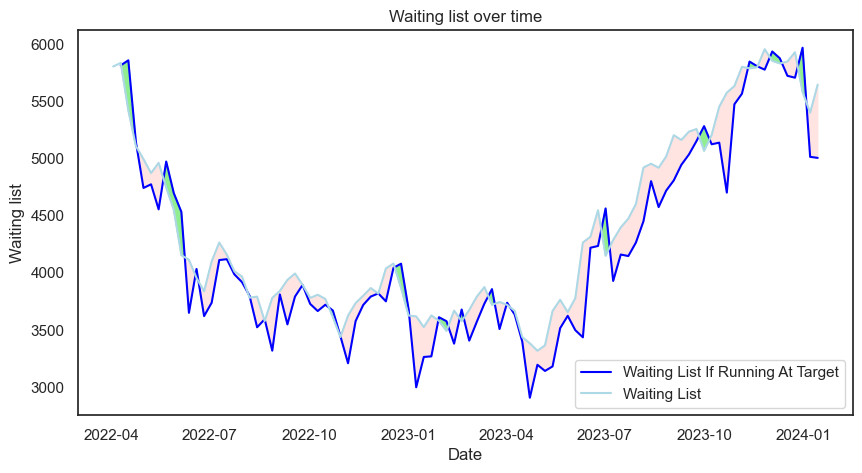

In [467]:
df['waiting_list_if_running_at_target'] = (df['new_demand'] + df['waiting_list'] - df['capacity']).shift(1)
df['below_target'] = np.where(df['waiting_list_if_running_at_target']<df['waiting_list'], 'Y', 'N')
fig, ax = plt.subplots(figsize=(10,5))
timeseries_plot(df, 'waiting_list_if_running_at_target', 'Waiting list', existing_ax=ax)
timeseries_plot(df, 'waiting_list', 'Waiting list', existing_ax=ax, color='lightblue')
plt.fill_between(df.index, df['waiting_list_if_running_at_target'], df['waiting_list'], color='lightgreen', where=(df['below_target']=='N'), interpolate=True)
plt.fill_between(df.index, df['waiting_list_if_running_at_target'], df['waiting_list'], color='mistyrose', where=(df['below_target']=='Y'), interpolate=True)